In [4]:
import numpy as np
import matplotlib.pyplot as plt


## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.


In [5]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


## Problem 1
How many samples are there in the dataset?



## Solution

In [6]:
X.shape

(1998, 2)

## Problem 2

How many features are there in the dataset?


## Solution

In [7]:
X

array([[ 3.76405235,  2.40015721],
       [ 2.97873798,  4.2408932 ],
       [ 3.86755799,  1.02272212],
       ...,
       [-6.46836696,  3.5764787 ],
       [-4.93469439,  2.2264872 ],
       [-4.60505181,  2.49611011]])

## Problem 3
Plot the dataset using matplotlib.



## Solution

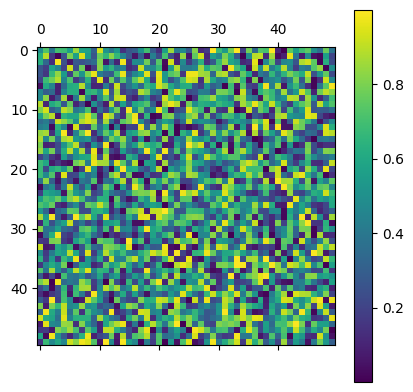

In [8]:
plt.matshow(np.random.random((50,50)))
plt.colorbar()
plt.show()

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [9]:
def obj(X, cluster_centers):
  obj_val = 0
  for i in range(len(X)):

    distances_between_clusters = []

    for cluster in cluster_centers:
      dist = np.linalg.norm(X[i] - cluster)**2
      distances_between_clusters.append(dist)

    obj_val += min(distances_between_clusters)

  return obj_val

print(obj(X, [200,800,1200]))

160991694.0927514


## Problem 4

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [10]:
from scipy.spatial.distance import cdist

def assign_clusters(X, k, cluster_centers):
    # Calculate the distances between data points and cluster centers
    distances = cdist(X, cluster_centers)

    # Assign each data point to the nearest cluster
    cluster_assignments = np.argmin(distances, axis=1)

    return cluster_assignments

# Given cluster centers (indices 200, 800, and 1200)
cluster_center_indices = [200, 800, 1200]
initial_cluster_centers = X[cluster_center_indices]

# Call the function to assign clusters
k = 3
cluster_assignments = assign_clusters(X, k, initial_cluster_centers)

# Calculate the mean of the cluster assignments
mean_cluster_assignment = np.mean(cluster_assignments)
mean_cluster_assignment = round(mean_cluster_assignment, 3)  # Round to 3 decimal places

print("Mean of cluster assignments:", mean_cluster_assignment)

Mean of cluster assignments: 0.711


## Problem 5

Plot the data points, with different color for different clusters.


## Solution

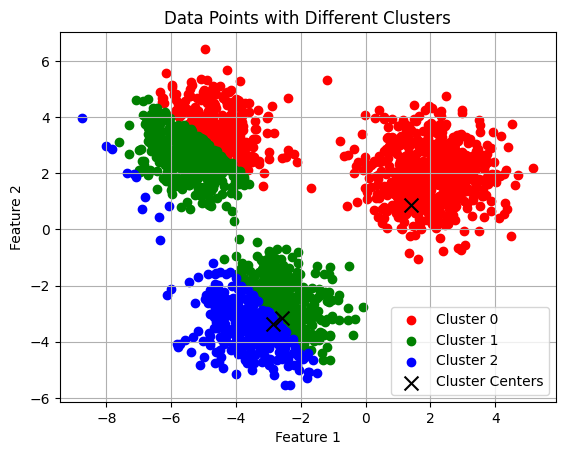

In [11]:
# Assign clusters and obtain cluster assignments
cluster_assignments = assign_clusters(X, k, initial_cluster_centers)

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Create a scatter plot for each cluster
for i in range(k):
    cluster_points = X[cluster_assignments == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')

# Plot the cluster centers as well
plt.scatter(initial_cluster_centers[:, 0], initial_cluster_centers[:, 1], c='k', marker='x', s=100, label='Cluster Centers')

plt.title("Data Points with Different Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [12]:

def compute_cluster_centers(X, z, k):
    cluster_centers = []
    for i in range(k):
        cluster_points = X[z == i]  # Data points in cluster i
        if len(cluster_points) > 0:
            cluster_center = np.mean(cluster_points, axis=0)
            cluster_centers.append(cluster_center)
    return np.array(cluster_centers)

# Compute cluster centers based on the initial cluster assignments
new_cluster_centers = compute_cluster_centers(X, cluster_assignments, k)

# Calculate the mean of the x-components of the cluster centers
mean_x_component = np.mean(new_cluster_centers[:, 0])
mean_x_component = round(mean_x_component, 3)  # Round to 3 decimal places

print("Mean of x-components of cluster centers:", mean_x_component)

Mean of x-components of cluster centers: -2.553




Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

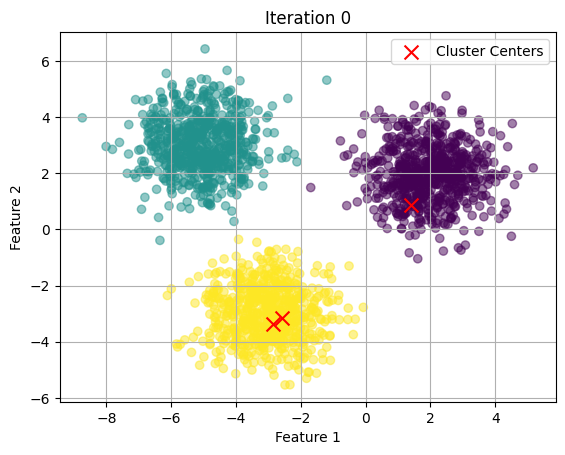

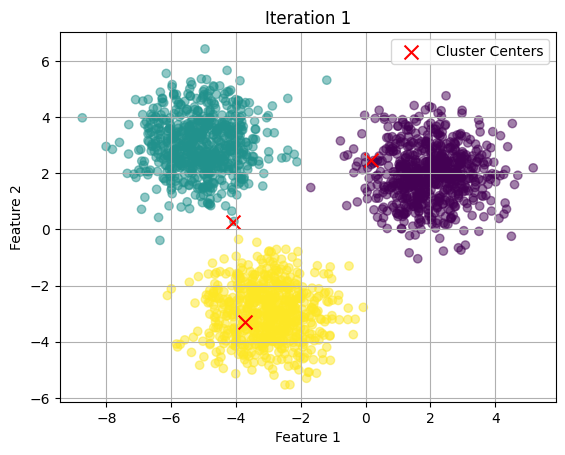

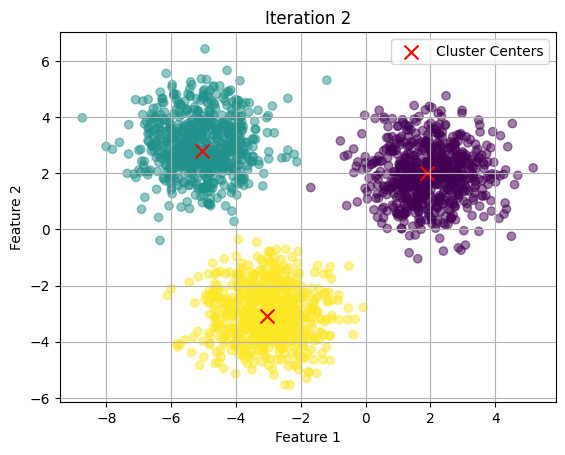

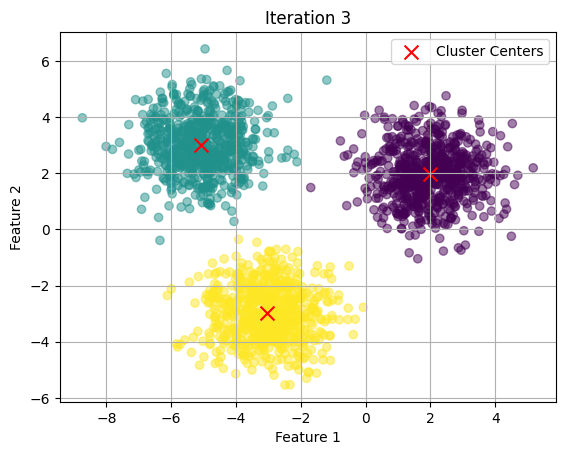

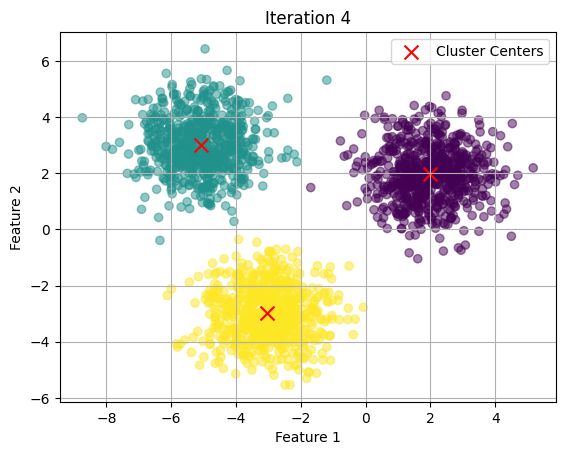

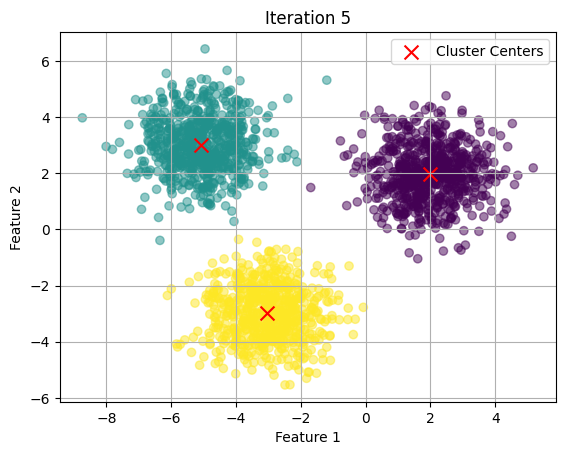

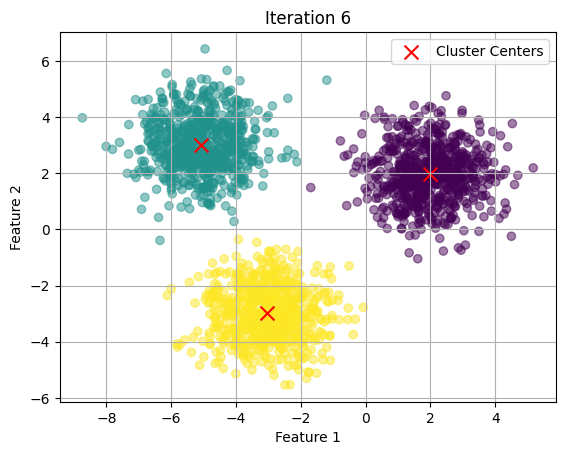

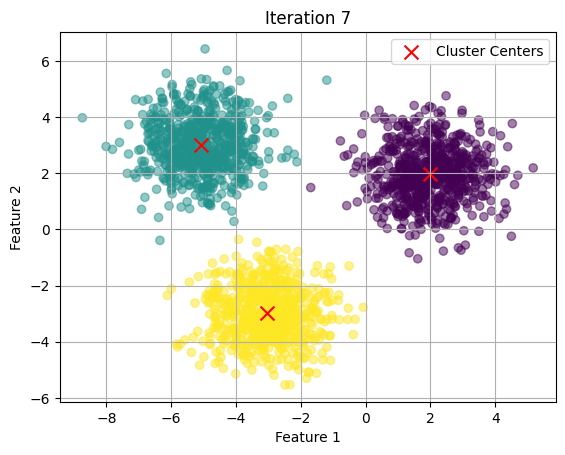

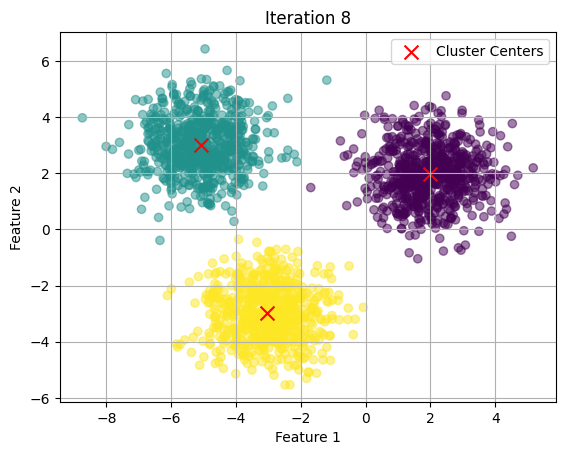

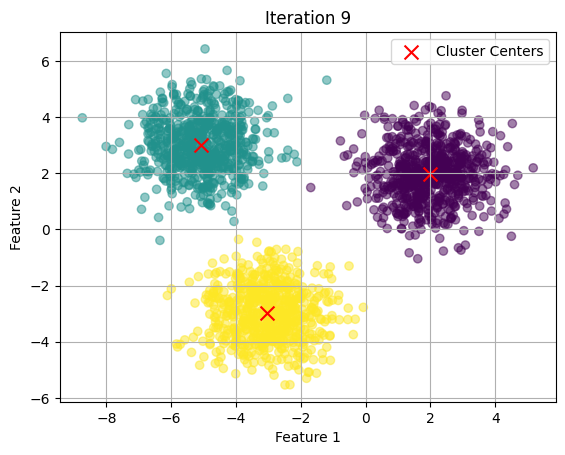

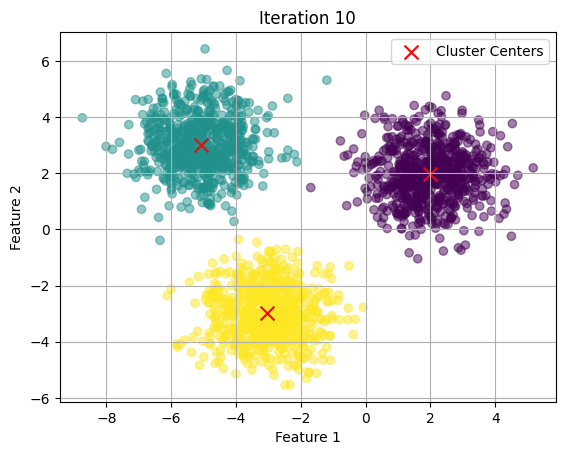

Mean of x-components of final cluster centers: -2.05


In [13]:
def assign_clusters(X, cluster_centers):
    distances = np.linalg.norm(X[:, np.newaxis] - cluster_centers, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def compute_cluster_centers(X, cluster_assignments, k):
    cluster_centers = []
    for i in range(k):
        cluster_points = X[cluster_assignments == i]
        if len(cluster_points) > 0:
            cluster_center = np.mean(cluster_points, axis=0)
            cluster_centers.append(cluster_center)
    return np.array(cluster_centers)

# Given values
k = 3
iterations = 10

# Initialize cluster centers with the given data points
cluster_center_indices = [200, 800, 1200]
cluster_centers = X[cluster_center_indices]

# Lists to store cluster centers for each iteration
cluster_centers_history = [cluster_centers]

for _ in range(iterations):
    # Assign data points to clusters
    cluster_assignments = assign_clusters(X, cluster_centers)

    # Compute new cluster centers
    new_cluster_centers = compute_cluster_centers(X, cluster_assignments, k)

    # Store the new cluster centers
    cluster_centers_history.append(new_cluster_centers)

    # Update cluster centers for the next iteration
    cluster_centers = new_cluster_centers

# Plot the data points and cluster centers for each iteration
for i, cluster_centers in enumerate(cluster_centers_history):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
    plt.title(f"Iteration {i}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)

plt.show()

# Compute and print the mean of the x-components of the final cluster centers
final_cluster_centers = cluster_centers_history[-1]
mean_x_component = np.mean(final_cluster_centers[:, 0])
mean_x_component = round(mean_x_component, 3)
print("Mean of x-components of final cluster centers:", mean_x_component)